<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Fastai/Notas_de_la_Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 3 - Deep Learning for Coders**

# **Respuestas al questionario**

1. **¿Cómo se representa una imagen en escala de grises en una computadora? ¿Qué tal una imagen en color?**

Se reprentan con matrices (lista de lista) en las cuales cada fila contiene las posiciones del pixel + la info del color (x, y, color)

Para el caso de imagenes en escalas de grises, se cuenta con un solo canal de color, el cual toma valores entre 0 a 255, siendo el 255 el negro y 0 el blanco. 

Para el caso de imagenes a color, tipicamente se utilizan 3 canales (RGB) los cuales permiten la combinacion de 3 colores (rojo, verde y azul) a distintas intensidades (de 0 a 255).

2. **¿Cómo están estructurados los archivos y carpetas del conjunto de datos `MNIST_SAMPLE`? ¿Por qué?**

Esta informacion ya se encuentra estructurada para los conjuntos de entrenamiento y validacion. Asimismo, la razon de porque esto podria llegar a ser util, es porque, de cierta forma estandariza, los resultados que vaya a obtener en relacion a otro grupo de personas que hayan seguido esta estructuracion. (todas las personas ocupan un mismo set de entrenamiento y un mismo set de validacion)

3. **Explica cómo funciona el enfoque de "pixel similarity" para clasificar dígitos.**

Lo que se intenta hacer con este metodo es:

- Estimar un digito 'ideal' calculando la media de cada pixel de un conjunto grande de imagenes. Asi
- Con la imagen del digito 'ideal' la intento comparar con la imagen del digito que intento predecir. Asi busco la manera de medir la distancia (RMSE o L1) entre los pixeles de la imagen de entrada y los pixeles de nuestro digito 'ideal'
- Luego, debo clasificar la imagen de entrada en la categoria dode se produjo la mener distancia entre los pixeles. 

4. **¿Qué es una lista de comprensión? Cree uno ahora que seleccione números impares de una lista y los duplique.**

Las listas de comprension, son aquellas en las que puedo aplicar operaciones sobre estas y se sobreentiende la interacion que se genera al interior de los elementos. 

```
lista = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lista_comprension = [i*2 for i in lista if i%2 != 0]
print(lista_comprension)
```

5. **¿Qué es un "tensor de rango 3"?**

Que tiene 'profundidad' de 3. (mas abajo espero dejarlo mas claro)

6. **¿Cuál es la diferencia entre el rango y la forma del tensor? ¿Cómo se obtiene el rango de la forma?**

El rango te da, por asi decirlo 'la profundidad de como se encuentran guardados los vectores'. Para llevarlo a un caso mas comun, podria plantearme donde se encuentra guardado un archivo.

```
 Escritorio -> Documentos -> Proyectos  ->  Nuevos  ->  Archivo.txt
               Imagenes      Borradores     Viejos
               Videos                       Pendientes     
```
Para esta estructura de datos, puedo decir que mi archivo tiene un rango de 4, porque tuve que acceder a 4 carpetas antes de poder abrirlo.

Para este mismo ejemplo, la forma lo que me dice es cuantos archivos contiene cada una de estas carpetas. [1, 3, 2, 3, 1]

```
lista = [[[1, 1, 1], [2, 2, 2], [3, 3, 3]]]
tor = torch.Tensor(lista)
print(tor.shape) -> torch.Size([1, 3, 3])
print(tor.ndim) -> 3
```

7. **¿Qué son las normas RMSE y L1?**

Estas son metodos para evitar que se cancelen errores positivos y negativos.

La norma RMSE lo que hace es:

\begin{equation}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i}^{real}-y_{i}^{pred})^2}
\end{equation}

En cambio lo que hace la norma L1 es:

\begin{equation}
L1 = \frac{1}{n} \sum_{i=1}^{n} |y_{i}^{real}-y_{i}^{pred}|
\end{equation}

8. ¿Cómo se puede aplicar un cálculo en miles de números a la vez, muchos miles de veces más rápido que un bucle de Python?

Esto se puede hacer utilizando 'Broadcasting'. De esta manera se puede desarrollar ciclos de procesos en tiempos similares a como si los estuviesemos ejecutando desde lenguaje de programacion C+. En suma, al trabajar con tensores, se saca provecho de ejecutarlos desde la GPU (la cual es mucho mas eficiente para realziar procesos en paralelo)

9. Cree un tensor o matriz de 3 × 3 que contenga los números del 1 al 9. Duplíquelo. Seleccione los cuatro números de la parte inferior derecha.

```
# Genere una matriz de 3x3 con digitos del 1 al 9
lista = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tor = torch.Tensor(lista)
print(tor)
>> tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

# Multiplique cada elemento de la matriz x2
tor *= 2
print(tor)
>> tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

# Rescate los ultimos 4 elementos de la esquina inferior a la derecha
tor_4 = tor[1:, 1:]
print(tor_4)
>> tensor([[10., 12.],
        [16., 18.]])

```


10. **¿Qué es el 'Broadcasting'?**

Son logicas que se aplican por defecto. Por ejemplo, al sumar dos tensores con distintos rangos. Es esperable que del resutado de esta operacion se genere un error, pero en lugar de eso, el programa restructura el tensor de menor rango replicando sus valores, para asi poder llevar a cabo la suma. (para este ejemplo, en la operacion no se guardan copias de los valores replicados, con lo cual tambien ayuda a desarrollar procesos con un menor consumo de almacenamiento)

11. **¿Las métricas generalmente se calculan utilizando el conjunto de entrenamiento o el conjunto de validación? ¿Por qué?**

Las metricas que se calculan para el conjunto de validacion miden principalmente el 'accuracy'. En cambio, para el entrenamiento se utiliza el 'loss'. En algunos casos las metricas de ambos conjunto pueden llegar a ser las mismas, sin embargo, como en el caso del ultimo ejercicio, se tuvo que modificar la funcion de perdida, ya que esta no funcionaba frente a pequeños cambios, es decir, esta generaba un gradiente de 0, con lo cual luego no se podian actualizar los parametros del modelo (se tuvo que cambiar la funcion de perdida y agregar una sigmoide para corregir este problema en los gradientes)

12. **¿Qué es SGD?**

SGD -> Stochastic Gradient Descent

Corresponde a un metodo iterativo por el cual se:
 - Se inicializa con parametros aleatorios
 - Se elabora una prediccion a partir de una muestra (batch)
 - Se calcula el error (loss)
 - Se calcula el gradiente
 - Se actualizan los parametros
 - Se vuelve a generar un prediccion
 - Repetimos todos los pasos hasta quedar conformes

13. **¿Por qué SGD usa mini batch?**

Usar un mini batch tiene una finalidad practica. Sucede que enviar los datos de entrenamiento por un ciclo ```for``` resulta ser bastante lento (**muchos epochs rapidos**). Asimismo, trabajar con todo el conjunto de entrenamiento como un vetor de entrada resulta ser mas eficiente al utilizar 'broadcasting', pero seguira siendo un entrenamiento lento (**cada epoch tomara mucho tiempo**).

Asi, una alternativa moderada, es armar una muestra aleatoria con algun tamaño mas razonable para el tratamiento de datos.

14. **¿Cuáles son los siete pasos del SGD para el aprendizaje automático?**


1)  Inicializar con parametros no optimizados
2)  Generar una prediccion con los datos de entrada
3)  Calcular la perdida (loss) de la prediccion
4)  Calcular el gradiente (indica como debe cambiar los parametros)
5)  Actualizar los parametros
6)  Volver al paso 2
7)  Iterar hasta que el modelo sea lo suficientemente bueno


15. **¿Cómo inicializamos los pesos en un modelo?**

Tipicamente los podemos inicializar de manera aleatoria o podriamos inicializarlos a partir de otro modelo previamente guardado, por ejemplo cuando haciamos fine_tune en las clases anteriores.

16. **¿Qué es "loss"?**

El loss es la metrica con la cual el modelo calcula la similitud de sus predicciones con la realidad. Esta luego es utilizada para el calculo del gradiente y asi, podenderados por un learning rate, actualizar los parametros del modelo para la siguiente iteracion.


17. **¿Por qué no siempre podemos utilizar un learning rate alto?**

Si utilizamos un learning rate muy alto, los desplazamientos en el espacio factible seran mucho grandes, con lo cual es mas probable que evitemos encontrar areas prometedoras que generen una perdida en el modelo mucho menor a las actuales. 


18. **¿Qué es un "gradiente"?**

En terminos sencillos, es la derivada que aplicamos a un vector. Asimismo, esta derivada nos ayuda comprender el comportamiento del vector al aumenta o disminuir alguno de los elementos que lo componen.


19. **¿Necesita saber cómo calcular gradientes usted mismo?**

Para este caso no es necesario, puesto que la biblioteca de Pytorch lo hace por nosotros cuando llamamos a la funcion ```backward()```


20. **¿Por qué no podemos utilizar el 'accuracy' como función de pérdida?**

La razon es que, para modelos de clasificacion, estos presentan problemas. 

Imaginemos que utilizamos el 'accuracy' como funcion de perdida de la siguiente manera:
```
cat1 = 1
cat2 = 0

def loss_cat1(prediccion, real):
  if real == 1: # la prediccion indica categoria1
    loss = real - prediccion
  else:  # categoria2
    loss = prediccion
   
```
Para ver como funciona, probemos estos dos casos:
``` 
# caso1
prediccion = 0.8
real = 1

print(loss_cat1(prediccion, real))
>> 0.2 # esto implica un loss bajo

# caso2
prediccion = 0.1
real = 1

print(loss_cat1(prediccion, real))
>> 0.9 # esto implica un loss alto
```
Que problemas tengo?
 - No me aguanta prediciones muy grandes (sobre 1) o muy baja (menores a -1)

21. **Dibuja la función sigmoidea. ¿Qué tiene de especial su forma?**

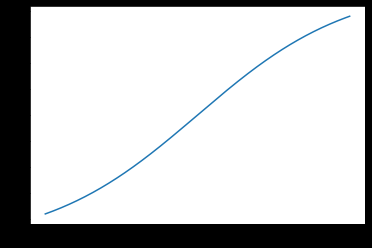

La funcion sigmoide tiene la siguiente formula:

\begin{equation}
F(x) = \frac{1}{1 + e^{-x}} 
\end{equation}

Asi, para valores muy pequeños (negativos) esta cada vez arroja valores mas cercanos a cero, sin nunca llegar a serlo. Caso contrario, para valores muy grandes (positivos) esta funcion arroja valores cada vez mas cercanos a uno.


22. **¿Cuál es la diferencia entre una función de pérdida y una métrica?**

El principal objetivo de la funcion de perdida es de ir asegurando que en cada iteracion las predicciones sean cada vez mas cercanas a los datos reales. En este sentido, la metrica que utilizamos para medir su efectividad corresponde al **loss**. 

Sin embargo, y como vimos en la clase pasada, estos modelos pueden llegar a presentar problemas si los dejamos demasiado ajustados a los datos del set de entrenamiento. Es por esta razon que tambien utilizamos una metrica adicional llamada **accuracy** para asi ir midiendo los aciertos que presenta el modelo con un set de datos para el cual nunca fue entrenado (set de validacion).


23. **¿Cuál es la función para calcular nuevos pesos usando una tasa de aprendizaje?**

\begin{equation}
w_{new} = w_{old} - w_{grad}*lr
\end{equation}

24. **¿Qué hace la clase `DataLoader`?**

Es la funcion que utilizamos la clase pasada para cargar los datos al modelo. Recordar que hay que ser especificos en como definir los set de entrenamiento y de validacion.

25. **Escriba un pseudocódigo que muestre los pasos básicos tomados en cada epoch del SGD.**

- Armar un mini-batch
- Pasar el mini-batch por el modelo y obtener las predicciones
- Comparar las predicciones con los valores reales y obtener la perdida
- Con la perdida calcular el gradiente
- Con el gradiente y el lr actualizar los pesos 
- Limpiar la informacion de gradientes generadas del proceso


26. **Cree una función que, si se le pasan dos argumentos `[1,2,3,4]` y `'abcd'`, devuelva` [(1,' a '), (2,' b '), (3 , 'c'), (4, 'd')] `. ¿Qué tiene de especial esa estructura de datos de salida?**

```
lista1 = [1, 2, 3, 4]
lista2 = ['a', 'b', 'c', 'd']

def tupla(lista1, lista2):
  return list(zip(lista1, lista2))

lista3 = tupla(lista1, lista2)
print(lista3)
>> [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
```

27. **¿Qué hace `view` en PyTorch?**

Tiene la misma funcion que el resize de Numpy. (Restructurar)

```
lista1 = [[1, 2], [3, 4]]

tensor1 = torch.Tensor(lista1)
print(tensor1.shape)
>> torch.Size([2, 2])

tensor1_view = tensor1.view([1, 4])
print(tensor1_view.shape)
>> torch.Size([1, 4])

# caso especial cuando utilizamos -1 
## lo reordena de manera que pueda trabajar con la estructura que le sigue
tensor1_view1 = tensor1.view([-1, 1])
print(tensor1_view1.shape)
>> torch.Size([4, 1])

```

28. **¿Cuáles son los parámetros de "bias" en una red neuronal? ¿Por qué los necesitamos?**

En una funcion lineal, estos se conocen como el 'intercepto' de la recta. Estos llegan a ser necesarios cuando nos encontramos en la situacion que el gradiente de como resultado 0, ya que de esta manera no hay forma de que sigan actualizando los datos.

Recordando la formula `w = w - grad(w)*lr`, si `grad(w) = 0`, luego `w = w` y con esto me quedo trabado, ya que luego solo obtendria `grad(0)`.

29. **¿Qué hace el operador `@` en Python?**

Este operador se utiliza para multiplicar matrices en Python.

30. **¿Qué hace el método "backward"?**

El metodo backward() calcula las derivadas para cada parametro del modelo, es decir, calcula el gradiente.

31. **¿Por qué tenemos que poner a cero los gradientes?**

Esto se hace porque se almacenan los registros de los gradientes anteriormente calculados de las ultimas capas. Asi, en cada iteracion es necesario actualizar los parametros y volver a poner a cero los gradientes.

32. **¿Qué información tenemos que pasar al "Learner"?**

- DataLoader
- El modelo de red neuronal
- Funcion de optimizacion
- Funcion de perdida
- Metrica de desempeño (aplicada al validation set)

33. **Muestre Python o pseudocódigo para los pasos básicos de un ciclo de entrenamiento.**

```
def train_epoch(model):
    for xb,yb in dl:             # 1) mini-batch
        calc_grad(xb, yb, model) # 2) Loss - Gradiente
        opt.step()               # 3) Actualizar pesos 
        opt.zero_grad()          # 4) Limpiar
                                 # 5) Repetir 
```

34. **¿Qué es "ReLU"? Dibuja un gráfico para los valores de `-2` a` + 2`.**

ReLU: Rectified Linear Unit.

```
x = np.linspace(-2, 2, 500)
x_tensor = torch.Tensor(x)
plt.plot(x, F.relu(x_tensor))
plt.show()
```

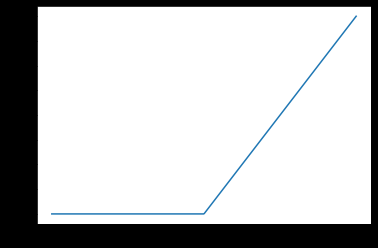

35. **¿Qué es una "función de activación"?**

Son las funciones que se utilizan entre los arreglos lineales, para asi darle un caracter no lineal a los modelos de redes neuronales.


36. **¿Cuál es la diferencia entre `F.relu` y` nn.ReLU`?**

Ambas llaman a la funcion relu, sin embargo, `F.relu` es una funcion, en cambio, `nn.ReLU` corresponde a una clase (hay que asignarla antes de poder ocuparla como funcion).

37. **El teorema de la aproximación universal muestra que cualquier función puede aproximarse tanto como sea necesario utilizando una sola no linealidad. Entonces, ¿por qué normalmente usamos más?**

Principalmente por temas de rendimiento. Con un modelo con más capas no necesitamos usar tantos parámetros. Tambien, en la practica, se ha visto que usando matrices más pequeñas y con más capas, es que se han obtenido mejores resultados.

In [1]:
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *

     |████████████████████████████████| 720 kB 7.9 MB/s 
     |████████████████████████████████| 1.2 MB 49.3 MB/s 
     |████████████████████████████████| 188 kB 73.7 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 51 kB 391 kB/s 


# **Antes de empezar**
Hubo un par de cosas que no le di tanta importancia de la clase pasada, pero que, sin embargo, si resultan utiles al momento de armar un modelo clasificador de imagenes.

## **Data augmentation**

### **Datos de prueba**

In [ ]:
# importamos las bibliotecas
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *


     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 188 kB 67.0 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.8 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 277 kB/s 


In [ ]:
# primero creamos una carpeta 
path = Path('osos')
path.mkdir()

In [ ]:
# ahora le voy a guardar una imagen
## Bilbiotecas necesarias
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=627e0fa139792e29e4f0b6163e1dbc26a80ff4be71c079f3ff1b160ccadbf6c9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
# ruta de la imagen
ruta_img = 'https://tse1.mm.bing.net/th?q=Fluffy+Bear&amp;w=42&amp;h=42&amp;c=7&amp;rs=1&amp;p=0&amp;o=5&amp;pid=1.7&amp;mkt=en-US&amp;adlt=moderate'
save_as = (str(path) + '/Grizzly0.jpg')
# guardamos una imagen en esta carpeta
wget.download(ruta_img, save_as)


'osos/Grizzly0.jpg'

In [ ]:
# voy a guardar varias copias de esta imagen, por si acaso me llegase
# a generar un problema al trabajar con un puro dato

for contador in range(100):
  save_as = (str(path) + '/Grizzly' + str(contador+1) + '.jpg')
  # guardamos una imagen en esta carpeta
  wget.download(ruta_img, save_as)

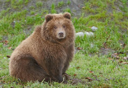

In [ ]:
# esta es la imagen original (reescalada)
im = Image.open(path/'Grizzly0.jpg')
im.to_thumb(128,128)

In [ ]:
# Para poder generar esta transformacion en la imagen, primero voy a crear este objeto
objeto1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

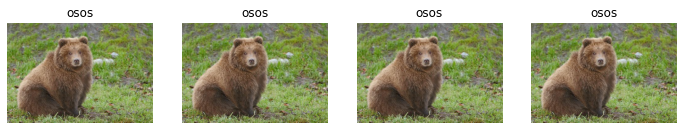

In [ ]:
dls = objeto1.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

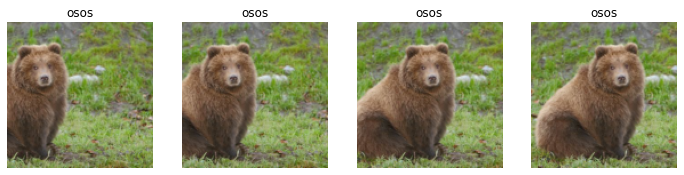

In [ ]:
# Aplicando el resize en item_tfms
objeto1 = objeto1.new(
    item_tfms=Resize(128))
dls = objeto1.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

**Nota**: Aplicando la funcion Resize en item_tfms, genera recortes en la imagen

### **RandomResizeCrop**

**Nota:** a diferencia del metodo anterior, en este podemos modificar la porcion de la imagen que queremos recortar.

In [ ]:
objeto2 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

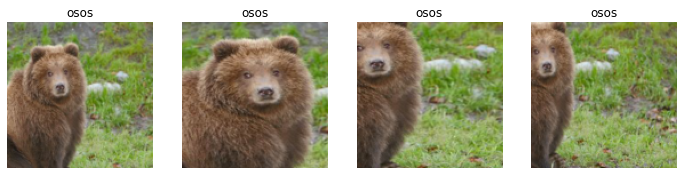

In [ ]:
# ahora le aplicamos el augmentation RandomResizedCrop
objeto2 = objeto2.new(item_tfms=RandomResizedCrop(128, min_scale=0.2))
dls = objeto2.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### **Otros tipos de augmentation data**


#### **Sin efectos**

In [ ]:
# cargamos un nuevo objeto
objeto3 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

In [ ]:
# con esta linea de codigo, se puede observar que vienen por defecto una serie
# transformaciones
doc(aug_transforms)

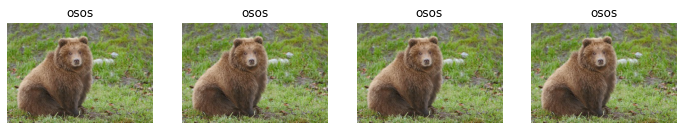

In [ ]:
# objeto sin transformacion

sin_efectos = aug_transforms(
        mult=0, 
        do_flip=False, 
        flip_vert=False, 
        max_rotate=0, 
        min_zoom=0, 
        max_zoom=0, 
        max_lighting=0, 
        max_warp=0, 
        p_affine=0, 
        p_lighting=0, 
        xtra_tfms=None, 
        size=None, 
        mode='bilinear', 
        pad_mode='reflection', 
        align_corners=True, 
        batch=False, 
        min_scale=1)

objeto3 = objeto3.new(batch_tfms=sin_efectos)

dls = objeto3.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

#### **Flip**

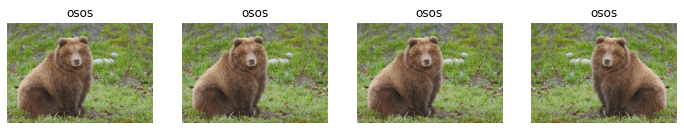

In [ ]:
# para hacerlo voltear
flip = aug_transforms(
        mult=0, 
        do_flip=True, 
        max_rotate=0, 
        min_zoom=0, 
        max_zoom=0, 
        max_lighting=0, 
        max_warp=0, 
        p_affine=0, 
        p_lighting=0)
objeto3 = objeto3.new(batch_tfms=flip)
dls = objeto3.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

#### **Rotate**

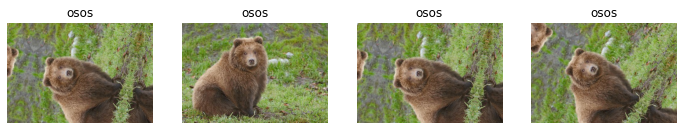

In [ ]:
# para hacerlo girar
## modificar mult, max_rotate, p_affine=0.75, min_zoom=1.0

rotate = aug_transforms(
        mult=1.0, 
        do_flip=True, 
        max_rotate=90.0, 
        min_zoom=1.0, 
        max_zoom=0, 
        max_lighting=0, 
        max_warp=0, 
        p_affine=0.75, 
        p_lighting=0)
objeto3 = objeto3.new(batch_tfms=rotate)
dls = objeto3.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

#### **Zoom**


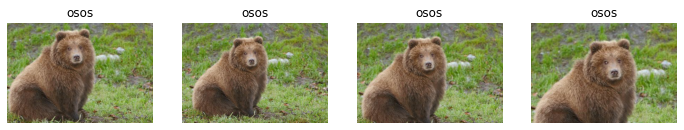

In [ ]:
# Para agrandar las imagenes
zoom = aug_transforms(
        mult=1.0, 
        do_flip=False, 
        max_rotate=0.0, 
        min_zoom=1.0, 
        max_zoom=3.0, 
        max_lighting=0, 
        max_warp=0, 
        p_affine=0.75, 
        p_lighting=0)
objeto3 = objeto3.new(batch_tfms=zoom)
dls = objeto3.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

#### **Warp**


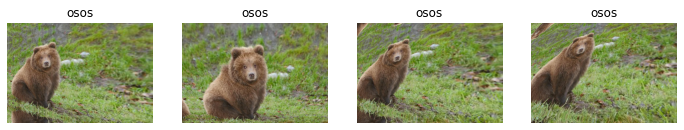

In [ ]:
# para deformar la imagen
warp = aug_transforms(
        mult=1.0, 
        do_flip=False, 
        max_rotate=0.0, 
        min_zoom=1.0, 
        max_zoom=0, 
        max_lighting=0.75, 
        max_warp=0.5, 
        p_affine=0.75, 
        p_lighting=0)
objeto3 = objeto3.new(batch_tfms=warp)
dls = objeto3.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

#### **Lighting**

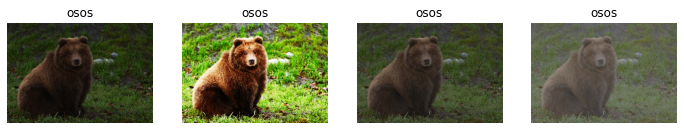

In [ ]:
# para hacer cambios de ilumminacion
lighting = aug_transforms(
        mult=1.0, 
        do_flip=False, 
        max_rotate=0.0, 
        min_zoom=1.0, 
        max_zoom=0, 
        max_lighting=0.8, 
        max_warp=0, 
        p_affine=0.75, 
        p_lighting=0.75)
objeto3 = objeto3.new(batch_tfms=lighting)
dls = objeto3.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# **Creando un lector de digitos**


In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     |████████████████████████████████| 720 kB 12.3 MB/s 
     |████████████████████████████████| 1.2 MB 21.1 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 188 kB 47.5 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 51 kB 325 kB/s 


## **Extraer los datos**

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## **Primera aproximacion**


In [ ]:
# Guardamos las imagenes como tensores en listas separadas
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

torch.Size([28, 28])

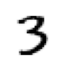

In [ ]:
# Un ejemplo de como se encuentran almacenados estas imagenes
show_image(three_tensors[1])
three_tensors[1].shape

In [ ]:
# ahora los vamos a superponer (agrupar)
## Al dividir por 255, se normaliza los datos entre valores de 0 a 1
## Notar que hicimos pasar una lista con tensores
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

torch.Size([28, 28])


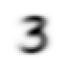

In [ ]:
# Ahora vamos a generar la imagen representativa para los '3'
## Lo que esto representa es que para cada pixel se calculo un promedio
## utilizando todas las imagenes donde apareciera un 3
mean3 = stacked_threes.mean(0)
print(mean3.shape)
show_image(mean3)

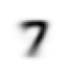

In [ ]:
# ahora hagamos lo mismo para los '7'
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [ ]:
# lo que sigue es definir una funcion que nos diga si una imagen es similar a otra
# mirando las diferencias existententes entre nuestro '3' promedio y la imagen de 
# entrada

imagen_entrada_3 = stacked_threes[0]
imagen_entrada_7 = stacked_sevens[0]

## Para medir la distancia, debemos hacernos cargo de no generar valores negativos
#1) L1 norm (calcula el valor absoluto de la distantia)

dist_3_L1_norm = (imagen_entrada_3 - mean3).abs().mean()
dist_7_L1_norm = (imagen_entrada_7 - mean7).abs().mean()

print(dist_3_L1_norm, dist_7_L1_norm)

#2) RMSE - L2 norm (calcula la raiz cuadrada del promedio de todas las diferencias al cuadrado) 

dist_3_L2_norm = ((imagen_entrada_3 - mean3)**2).mean().sqrt()
dist_7_L2_norm = ((imagen_entrada_7 - mean7)**2).mean().sqrt()

print(dist_3_L2_norm, dist_7_L2_norm)

# Notar: En ambos metodos el valor a la izquierda (correspondiente a los 3)
# tiene un menor error, con lo cual me decantaria por decir que corresponde a 
# un 3.

tensor(0.1074) tensor(0.1095)
tensor(0.1912) tensor(0.2196)


In [ ]:
# La biblioteca de pytorch ya cuenta con estas dos funciones de error

# Equivalentes en pytorch
# 1) L1 norm
print(F.l1_loss(imagen_entrada_3, mean3), F.l1_loss(imagen_entrada_7, mean7))

# 2) L2 norm
print(F.mse_loss(imagen_entrada_3, mean3).sqrt(), F.mse_loss(imagen_entrada_7, mean7).sqrt())

# Nota: para el segundo caso todavia es necesario agregar la raiz cuadrada al final

tensor(0.1074) tensor(0.1095)
tensor(0.1912) tensor(0.2196)


### **Verifiquemos el rendimiento**

In [ ]:
# En la carpeta donde sacamos los dastos, ya se encontraban algunos
# listo para usarse como el conjunto de validacion

valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
# Esta es una manera de calcular el error (la disntancia)
## Notar que al poner mean((-1, -2)) se esta reficieriendo a que
## utilice las ultimas posiciones del tensor, siendo estas las cordenadas
## x e y del pixel.
def mnist_distance(a,b): 
  return (a-b).abs().mean((-1,-2))
print(mnist_distance(imagen_entrada_3, mean3))

tensor(0.1074)


In [ ]:
# Con la funcion antes definida
valid_3_dist = mnist_distance(valid_3_tens, mean3)
print(valid_3_dist, valid_3_dist.shape)



tensor([0.1402, 0.1279, 0.1154,  ..., 0.1197, 0.1299, 0.1210]) torch.Size([1010])


In [ ]:
# con esto definimos la siguiente funcion (la voy a modificar un poco)
def is_3(x):   
  return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
# medimos e desempeño
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
# otra manera de mirar el desempeño
prediccion3_real3 = is_3(valid_3_tens).float().sum().item()
prediccion7_real3 = len(valid_3_tens)-prediccion3_real3
prediccion7_real7 = (1-is_3(valid_7_tens).float()).sum().item()
prediccion3_real7 = len(valid_7_tens)-prediccion7_real7

total_3 = len(valid_3_tens)
total_7 = len(valid_7_tens)

print('Total de 3: {}'.format(total_3))
print('Total de 7: {} \n'.format(total_7))

print('    Matriz de Confusion (Totales)    ')
print('----------------------------')
print('        pred_3        pred_7')
print('real_3   {}         {}'.format(prediccion3_real3, prediccion7_real3))
print('real_7   {}         {}'.format(prediccion3_real7, prediccion7_real7))

print('\n   Matriz de Confusion (Porcentuales)    ')
print('----------------------------')
print('        pred_3        pred_7')
print('real_3   {}%         {}%'.format(round(prediccion3_real3/total_3*100, 2), round(prediccion7_real3/total_7*100, 2)))
print('real_7   {}%         {}%'.format(round(prediccion3_real7/total_3*100, 2), round(prediccion7_real7/total_7*100)))



Total de 3: 1010
Total de 7: 1028 

    Matriz de Confusion (Totales)    
----------------------------
        pred_3        pred_7
real_3   926.0         84.0
real_7   15.0         1013.0

   Matriz de Confusion (Porcentuales)    
----------------------------
        pred_3        pred_7
real_3   91.68%         8.17%
real_7   1.49%         99%


## **Gradiant Descent**


1. Inicializar con parametros no optimizados
2. Generar una prediccion con los datos de entrada
3. Calcular la perdida (loss) de la prediccion
4. Calcular el gradiente (indica como debe cambiar los parametros)
5. Actualizar los parametros
6. Volver al paso 2
7. Iterar hasta que el modelo sea lo suficientemente bueno

In [ ]:
def f(x): return x**2

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


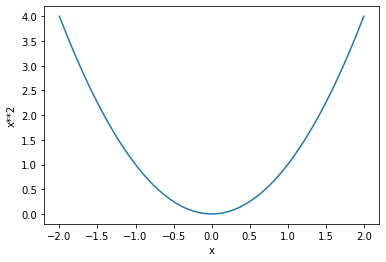

In [ ]:
plot_function(f, 'x', 'x**2')

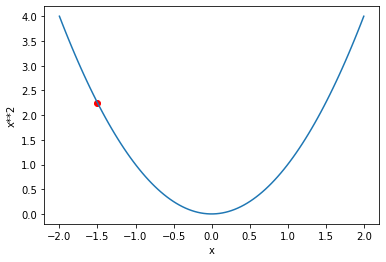

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

### **Calcular el gradiente**

Para esto es que requerimos necesitamos utilizar derivas y asi estimar como se debe realizar el cambio en los parametros, para hacer cada vez menor la perdida. En este sentido la bibliotaca de Pytorch nos entrega un buen set de herramientas para ayudarnos a hacer estos calculos diferenciales.


In [ ]:
# ejemplo
xt = tensor(3.).requires_grad_() # con esto indicamos a pytorch que vamos a ocupar gradientes

# definimos una funcion
yt = f(xt)
print(yt)

# calculamos la derivada
yt.backward()

# ahora podemos ver le gradiente
xt.grad


tensor(9., grad_fn=<PowBackward0>)


tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

### **Definir el Learning Rate**
Con el gradiente nosotros obtenemos la direccion en la cual tenemos que cambiar los parametros y con el LR nosotros definimos cuanto cambiar en esa direccion. (generalmente entre 0.1 - 0.001)

Luego actualizamos los parametros de la siguiente manera:
```
w = w - grad(w)*lr
```


## **Aplicando Gradient Descent**

In [ ]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

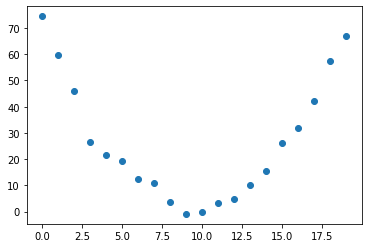

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

Imaginemos que esto tiene una funcion cuadratica que explica la velocidad de la montaña rusa. Esta funcion cuadratica tendra la siguiente estructura:

$v(t) = at^2+bt+c$



In [ ]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): 
  return ((preds-targets)**2).mean().sqrt()

1. Inicializar con parametros no optimizados


In [ ]:
# Generamos los parametros a, b y c
params = torch.randn(3).requires_grad_()

In [ ]:
# Guardamos una copia de los parametros iniciales
orig_params = params.clone()


2. Generar una prediccion con los datos de entrada


In [ ]:
# Genero la prediccion
preds = f(time, params)

In [ ]:
# azul para los valores reales
# rojo para los valores predichos
def show_preds(preds, ax=None):
    if ax is None: 
      ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-100,100)

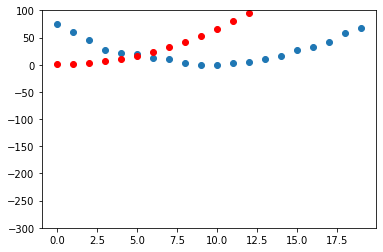

In [ ]:
show_preds(preds)

3. Calcular la perdida (loss) de la prediccion


In [ ]:
# Se calcula la perdida
loss = mse(preds, speed)
loss

tensor(92.9071, grad_fn=<SqrtBackward>)

4. Calcular el gradiente (indica como debe cambiar los parametros)


In [ ]:
# se calculan las derivadas (direcciones en las que corregir)
loss.backward()
params.grad

tensor([160.9192,  10.3137,   0.6012])

In [ ]:
# se ajustan las correcciones con el learning rate
params.grad * 1e-5
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

5. Actualizar los parametros


In [ ]:
# se actualizan los parametros
lr = 1e-5
params.data -= lr * params.grad.data

# limpiamos lo del paso anterior
params.grad = None

In [ ]:
# volvemos a generar una prediccion
preds = f(time,params)

# volvemos a calcular el error
mse(preds, speed)

tensor(92.6472, grad_fn=<SqrtBackward>)

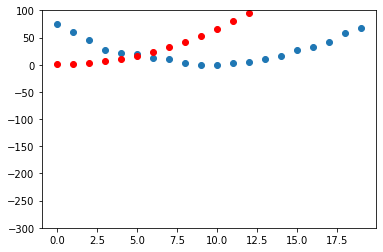

In [ ]:
show_preds(preds)

In [ ]:
# Definimos una funcion de entrenamiento
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: 
      print(loss.item())
    return preds


6. Volver al paso 2


In [ ]:
# voy a cambiar el lr, porque avanza muy lento
lr=0.001

# llamamos a la funcion de entrenamiento
for i in range(10000): 
  apply_step(params, prn=False)

apply_step(params)

14.12480354309082


tensor([49.2206, 39.8141, 31.6709, 24.7909, 19.1740, 14.8204, 11.7300,  9.9028,  9.3388, 10.0379, 12.0004, 15.2260, 19.7148, 25.4668, 32.4820, 40.7604, 50.3021, 61.1069, 73.1749, 86.5062],
       grad_fn=<AddBackward0>)

In [ ]:
params = orig_params.detach().requires_grad_()

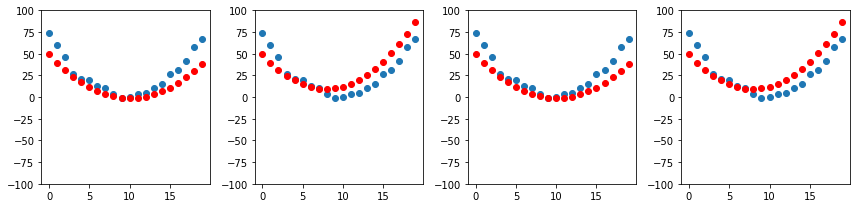

In [ ]:
# Graficamos los puntos
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: 
  show_preds(apply_step(params, False), ax)
plt.tight_layout()

7. Iterar hasta que el modelo sea lo suficientemente bueno

In [ ]:
# estos son los parametros que se obtuvieron
params

tensor([  0.4996, -10.0467,  49.2210], requires_grad=True)

# **Gradient Descent para el lector de numeros**

## **Preparativos**

In [ ]:
# Voy  a volver a cargar las bibliotecas
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *

In [ ]:
# Voy a volver a cargar los datos
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

In [ ]:
# Ahora juntamos todo en un vector (son 12396 vectores que contienen 784 valores)
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [ ]:
# Ahora, tenemos que crear las etiquetas
## A los '3' los vamos a etiquetar con 1
## A los '7' los vamos a etiquetar con 0
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [ ]:
# En pytorch necetimos ocupar tuplas para etiqutar los datos
## tupla = (imagen, etiqueta)

dset = list(zip(train_x,train_y)) # se utiliza zip para juntarlos, luego list para crear una lista
imagen, etiqueta = dset[0]
print('dimension de la imagen (largo x ancho): ', imagen.shape)
print('numero de la etiqueta (1 para "3" y 0 para "7": ', etiqueta)

dimension de la imagen (largo x ancho):  torch.Size([784])
numero de la etiqueta (1 para "3" y 0 para "7":  tensor([1])


In [ ]:
# Hacemos lo mismo para el set de validacion
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

## **1) Iniciacion aleatoria**

In [ ]:
# Funcion para iniciar con valore aleatorios
def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_()

In [ ]:
# definimos la cantidad de parametros 
weights = init_params((28*28,1))
weights.shape

torch.Size([784, 1])

In [ ]:
# Esto es para generar la ecuacion y=wx+b
bias = init_params(1)
bias.shape

torch.Size([1])

## **2) Hacer predicciones**

In [ ]:
print(train_x[0].shape)
print(weights.shape)
print(weights.T.shape)
print((train_x[0]*weights.T).shape)

torch.Size([784])
torch.Size([784, 1])
torch.Size([1, 784])
torch.Size([1, 784])


In [ ]:
# Esto es equivalente a sum(x*w) + b
## Ojo, solo para una imagen
(train_x[0]*weights.T).sum() + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [ ]:
# Asi lo hacemos para el resto de las imagenes
# @ es para multiplicar matrices
def linear1(xb): 
  return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

## **3) Calcular la perdida**

In [ ]:
# Aqui estamos viendo que tan bien predice el '3' (etiqueta 1)
corrects = (preds>0.5).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [ ]:
# Que tan bien predice el '3' en promedio
corrects.float().mean().item()

0.5355759859085083

### **Definiendo una funcion de perdida (loss)**

¿Como asegurar que las predicciones se encuentren entre 0 y 1?

In [ ]:
# utilizamos una funcion de activacion, para asegurar que esto suceda
def sigmoid(x): 
  return 1/(1+torch.exp(-x))

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


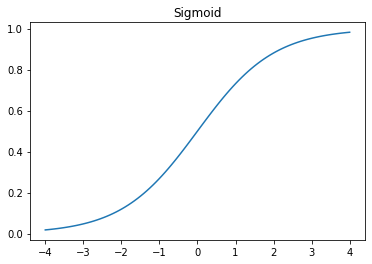

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
# actualizamos la funcion de perdida
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

## **4) Calculando el gradiente**

### **Definiendo mini-batches**

In [ ]:
# Fastai ya nos entrega una funcion para hacerlo
## ejemplo
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
# luego podemos generar un mini-batch de la siguiente manera
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 7, 24, 17, 21,  5, 19]), ('h', 'y', 'r', 'v', 'f', 't')),
 (tensor([ 9, 15, 14,  4, 16,  0]), ('j', 'p', 'o', 'e', 'q', 'a')),
 (tensor([22, 13, 25,  3,  2, 11]), ('w', 'n', 'z', 'd', 'c', 'l')),
 (tensor([12, 23,  1, 10,  8, 20]), ('m', 'x', 'b', 'k', 'i', 'u')),
 (tensor([18,  6]), ('s', 'g'))]

### **Colocando todo junto**

In [ ]:
# funcion para inicializar los parametros del modelo
def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_()

# funcion del modelo
def linear1(xb): 
  return xb@weights + bias

# funcion de activacion (retorna valores entre 0 y 1)
def sigmoid(x): 
  return 1/(1+torch.exp(-x))

# funcion de perdida
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

# funcion para calcular los gradientes
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

# funcion para entrenar al moedelo
def train_epoch(model, lr, params):
  for xb, yb, in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

# funcion para medir el accuracy
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds > 0.5) == yb
  return correct.float().mean()

# funcion para medir el accuracy sobre el validation set
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [ ]:
# Parametros
weights = init_params((28*28,1))
bias = init_params(1)

dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

lr = 1.
params = weights,bias

# ciclo de entrenamiento
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.7304 0.8505 0.9008 0.9291 0.9389 0.9443 0.9526 0.9545 0.9589 0.9613 0.9623 0.9623 0.9633 0.9638 0.9648 0.9662 0.9667 0.9672 0.9672 0.9677 

## **Creando un optimizador**


In [ ]:
# Generar un modelo (equivalente a linear1()) desde Pytorch
linear_model = nn.Linear(28*28,1)

In [ ]:
# Definiendo los parametro para el modelo
w,b = linear_model.parameters()

In [ ]:
# Defieniendo un optimizador (SGD)
class BasicOptim:
    def __init__(self, params, lr): 
      self.params = list(params)
      self.lr = lr

    def step(self, *args, **kwargs):
        for p in self.params: 
          p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: 
          p.grad = None

In [ ]:
# al optimizador le pasamos el modelo y el learning rate
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
# Definimos una funcion por episodio (epoch)
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
# Llamamos a la funcion de episodios y la utilizamos para el entrenamiento
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.8222 0.8457 0.9131 0.9341 0.9472 0.956 0.9619 0.9653 0.9668 0.9697 0.9712 0.9736 0.9746 0.9761 0.9765 0.9775 0.978 0.9785 0.9785 

In [ ]:
# SGD tambien lo proporciona fastai
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7715 0.8535 0.9175 0.935 0.9477 0.9565 0.9634 0.9658 0.9678 0.9702 0.9721 0.9741 0.9746 0.9756 0.9765 0.9775 0.978 0.9785 0.9785 

## **Desde la biblioteca de Fastai**

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636625,0.503528,0.495584,00:00
1,0.541015,0.159091,0.876349,00:00
2,0.197625,0.195228,0.820412,00:00
3,0.086197,0.110640,0.907753,00:00
4,0.045158,0.079781,0.932287,00:00
5,0.029181,0.063531,0.946025,00:00
6,0.022634,0.053469,0.954858,00:00
7,0.019742,0.046797,0.961727,00:00
8,0.018290,0.042128,0.965162,00:00
9,0.017428,0.038695,0.967125,00:00


# **Agregando mas capas (no-linealidad)**

Ejemplo de red neuronal (no lineal):
- Dos capas + funcion Relu
```
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res
```

Funcion ReLU (Rectified Linear Unit)

\begin{equation}
F(x) = 
\begin{cases}
x \quad \forall x \geq 0 \\
0 \quad \forall x \leq 0
\end{cases}
\end{equation}

In [ ]:
# La misma red, pero usando las funciones de Pytorch
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1))

In [ ]:
# Ahora podemos pasar el nuevo modelo al objeto de aprendizaje de Fastai
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.276824,0.411482,0.507360,00:00
1,0.133145,0.217713,0.816487,00:00
2,0.075615,0.111775,0.917076,00:00
3,0.050913,0.076581,0.940628,00:00
4,0.039293,0.060272,0.956330,00:00
5,0.033254,0.050987,0.964671,00:00
6,0.029728,0.045065,0.965162,00:00
7,0.027401,0.041000,0.966634,00:00
8,0.025705,0.038029,0.969087,00:00
9,0.024379,0.035760,0.971541,00:00


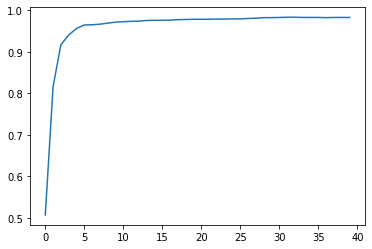

In [ ]:
# veamos como fue el desempeño del accuracy
plt.plot(L(learn.recorder.values).itemgot(2))

# **A lo que esperamos llegar**

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,0.092840,0.019722,0.994603,00:14
